Data Import

In [33]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,7]

In [34]:
from data_mouse import y, X, labels

Lasso Regression (L1 Regularization)

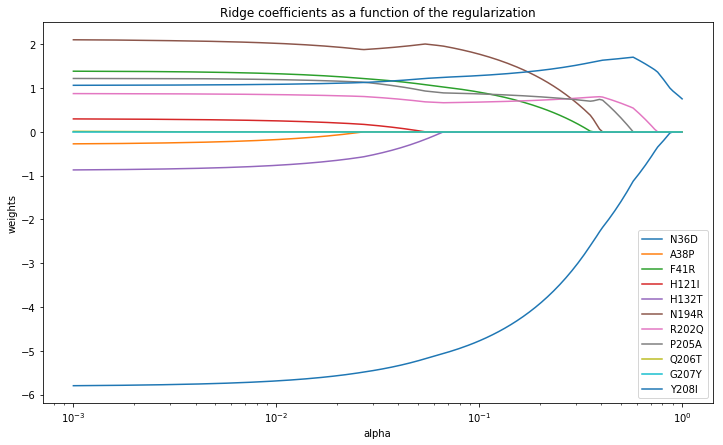

In [35]:
n_alphas = 200
alphas = np.logspace(-3, 0, n_alphas)

coefs = []
for a in alphas:
    ridge = Lasso(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(labels)
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


Ridge Regression (L2 Regularization)

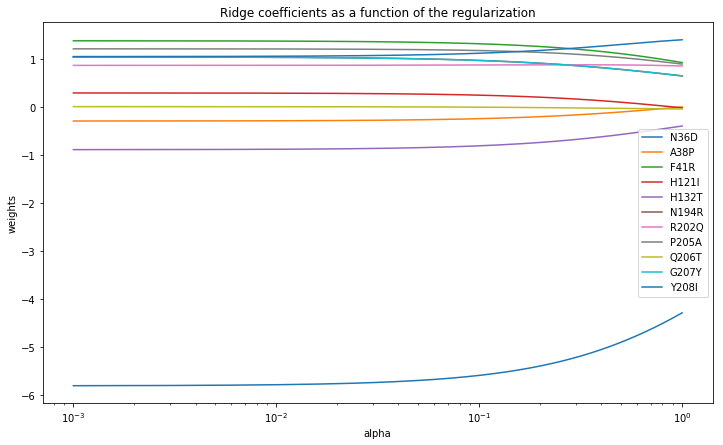

In [36]:
n_alphas = 200
alphas = np.logspace(-3, 0, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(labels)
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


PCA and Linear Regression

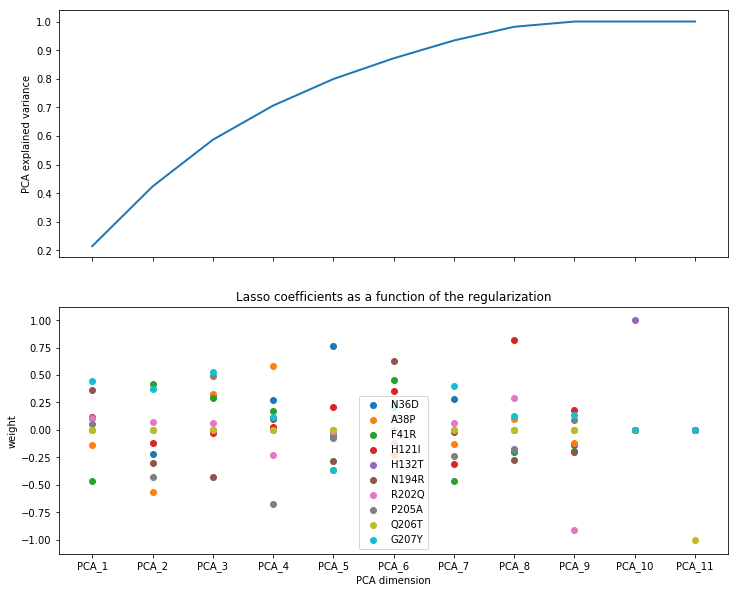

In [59]:
weights = []
score = []

pca = PCA(svd_solver='full')
pca.fit(X)
PCA_X = pca.fit_transform(X)


variance_total = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_) ]

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 10))

ax0.plot(np.arange(1,len(labels)+1),variance_total, linewidth=2)
ax0.set_ylabel('PCA explained variance')

for i in np.arange(1,len(labels)):
    ax1.scatter(np.arange(1,len(labels)+1), pca.components_[:,i])
    ax1.set_xlim(ax.get_xlim())  # reverse axis
plt.xticks(np.arange(1,len(labels)+1),['PCA_'+str(i) for i in np.arange(1,len(labels)+1)])
ax1.set_xlabel('PCA dimension')
ax1.set_ylabel('weight')
ax1.legend(labels)
ax1.set_title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

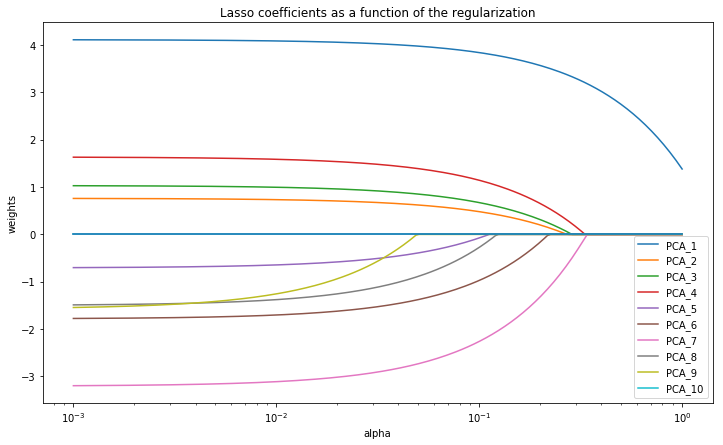

In [38]:
n_alphas = 200
alphas = np.logspace(-3, 0, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(PCA_X, y)
    coefs.append(lasso.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(['PCA_'+str(i) for i in np.arange(1,len(labels))])
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
